## Importing the libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as r2

## Importing the dataset

In [2]:
dataset = pd.read_csv('InsuranceCostPrediction.csv')

In [3]:
dataset.head()

,Time,age,children,BMI,smoker,diabetes,surgery,chronic disease,gender,insurance amount
0,03/11/2022 15:23,36,2,26.6,No,No,Yes,No,Female,19000
1,03/11/2022 15:24,32,0,20.8,No,No,No,Yes,Female,25000
2,03/11/2022 15:26,28,0,22.3,No,No,No,No,Female,18000
3,03/11/2022 15:27,68,4,28.2,Yes,Yes,Yes,Yes,Male,40000
4,03/11/2022 15:30,55,4,31.0,No,No,Yes,Yes,Female,30000


In [4]:
dataset.shape

(300, 10)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              300 non-null    object 
 1   age               300 non-null    int64  
 2   children          300 non-null    int64  
 3   BMI               300 non-null    float64
 4   smoker            300 non-null    object 
 5   diabetes          300 non-null    object 
 6   surgery           300 non-null    object 
 7   chronic disease   300 non-null    object 
 8   gender            300 non-null    object 
 9   insurance amount  300 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 23.6+ KB


In [6]:
dataset.isnull().sum()

Time                0
age                 0
children            0
BMI                 0
smoker              0
diabetes            0
surgery             0
chronic disease     0
gender              0
insurance amount    0
dtype: int64

## Dataset Analysis

<Figure size 432x432 with 0 Axes>

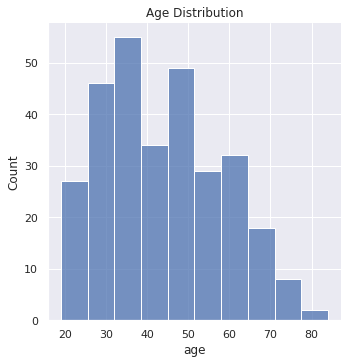

In [7]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dataset['age'])
plt.title('Age Distribution')
plt.show()

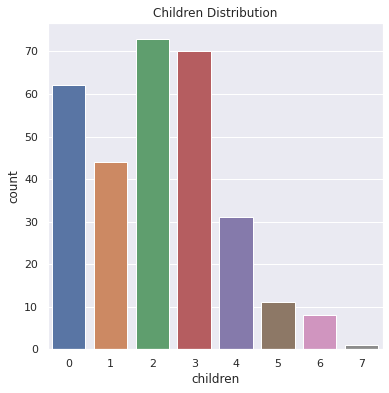

In [8]:
#distribution of children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=dataset)
plt.title('Children Distribution')
plt.show()

<Figure size 432x432 with 0 Axes>

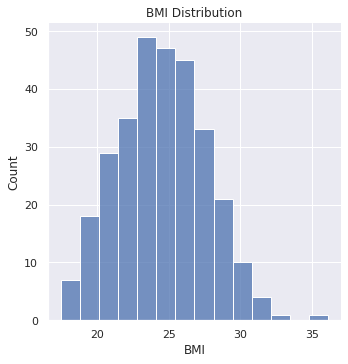

In [9]:
#distribution of bmi
plt.figure(figsize=(6,6))
sns.displot(dataset['BMI'])
plt.title('BMI Distribution')
plt.show()

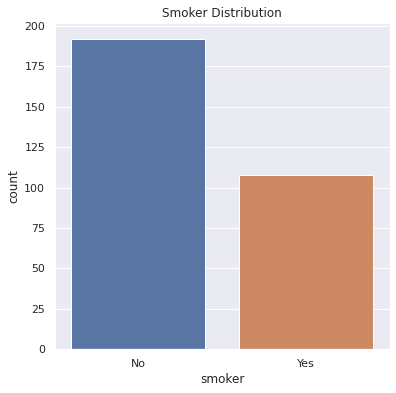

In [10]:
#distribution of smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=dataset)
plt.title('Smoker Distribution')
plt.show()

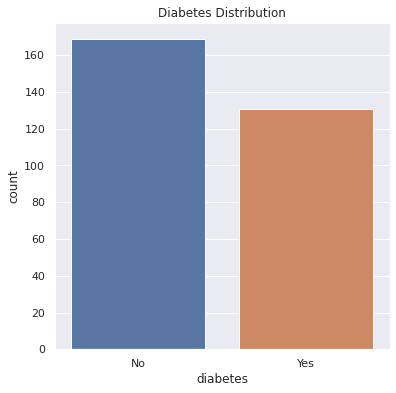

In [11]:
#distribution of diabetes column
plt.figure(figsize=(6,6))
sns.countplot(x='diabetes',data=dataset)
plt.title('Diabetes Distribution')
plt.show()

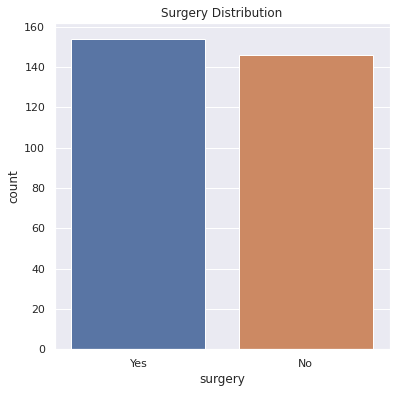

In [12]:
#distribution of surgery column
plt.figure(figsize=(6,6))
sns.countplot(x='surgery',data=dataset)
plt.title('Surgery Distribution')
plt.show()

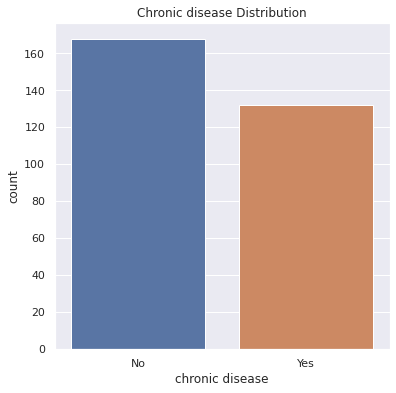

In [13]:
#distribution of chronic disease column
plt.figure(figsize=(6,6))
sns.countplot(x='chronic disease',data=dataset)
plt.title('Chronic disease Distribution')
plt.show()

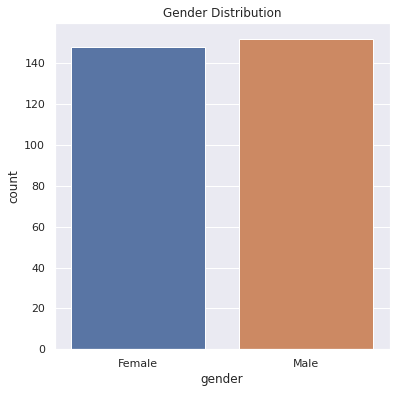

In [14]:
#distribution of gender column
plt.figure(figsize=(6,6))
sns.countplot(x='gender',data=dataset)
plt.title('Gender Distribution')
plt.show()

<Figure size 432x432 with 0 Axes>

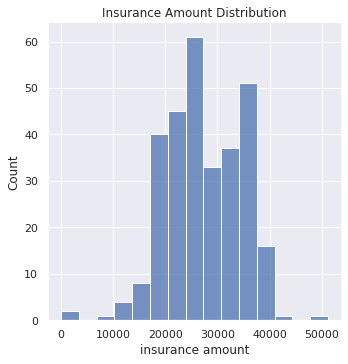

In [15]:
#distribution of insurance amount
plt.figure(figsize=(6,6))
sns.displot(dataset['insurance amount'])
plt.title('Insurance Amount Distribution')
plt.show()

## Encoding categorical data

In [16]:
#smoker column
dataset.replace({'smoker':{'Yes':1, 'No':0}}, inplace=True)

#diabetes column
dataset.replace({'diabetes':{'Yes':1, 'No':0}}, inplace=True)

#surgery column
dataset.replace({'surgery':{'Yes':1, 'No':0}}, inplace=True)

#chronic disease column
dataset.replace({'chronic disease':{'Yes':1, 'No':0}}, inplace=True)

#gender column
dataset.replace({'gender':{'Female':1, 'Male':0}}, inplace=True)

In [17]:
dataset.head()

,Time,age,children,BMI,smoker,diabetes,surgery,chronic disease,gender,insurance amount
0,03/11/2022 15:23,36,2,26.6,0,0,1,0,1,19000
1,03/11/2022 15:24,32,0,20.8,0,0,0,1,1,25000
2,03/11/2022 15:26,28,0,22.3,0,0,0,0,1,18000
3,03/11/2022 15:27,68,4,28.2,1,1,1,1,0,40000
4,03/11/2022 15:30,55,4,31.0,0,0,1,1,1,30000


## Splitting the dataset

In [18]:
#splitting features and target
x = dataset.iloc[:, 1:-1].values
y = dataset['insurance amount']

In [19]:
print(x)

[[36.   2.  26.6 ...  1.   0.   1. ]
 [32.   0.  20.8 ...  0.   1.   1. ]
 [28.   0.  22.3 ...  0.   0.   1. ]
 ...
 [69.   6.  29.7 ...  1.   1.   1. ]
 [77.   4.  30.  ...  1.   1.   0. ]
 [24.   0.  23.3 ...  0.   1.   1. ]]


In [20]:
print(y)

0      19000
1      25000
2      18000
3      40000
4      30000
       ...  
295    36600
296    37000
297    38900
298    40000
299    18700
Name: insurance amount, Length: 300, dtype: int64


In [21]:
#splitting training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Multiple Linear Regression Model


In [22]:
#Training
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Training score :  0.6229856135216898
predictions are :
 [23829.90885026 21739.32258529 33441.58984935 17998.93811671
 30711.3839184  35263.01707717 27262.56325317 17135.24592657
 18421.9497188  28339.24721273 24974.03598716 33445.58996172
 19073.72822111 29504.0489859  30510.11386996 24358.51613826
 28209.08685824 28756.1842749  38002.45901749 33017.61472571
 29137.66868358 17568.89576677 27949.1625258  33071.55825847
 32631.46149026 22181.70838493 32411.99799415 22838.8196986
 27345.85970552 31722.32703041 23467.87180706 17715.65906017
 25563.58417932 21685.64554443 30206.47194708 18371.69979437
 31508.52577215 35204.62741124 21398.10811485 23411.78589796
 36281.53163852 29223.92399793 29634.71316479 21528.08037782
 20527.10942484 17719.64554004 30108.75995608 21464.95831959
 30257.82160503 18762.43958647 27493.00584738 24179.29485771
 18751.8712095  25124.3679931  32690.85187452 21482.2369785
 28524.50151279 18755.09971015 28801.40575698 23367.37195821]




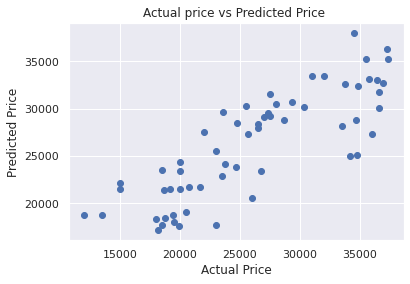

In [23]:
#Predicting
y_pred = regressor.predict(x_test)

print('Training score : ',regressor.score(x_train,y_train))

print('predictions are :\n',y_pred)
print('\n')

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price ")
plt.show()

In [24]:
print(y_test)

208    24700
188    20800
12     31000
221    19500
239    29400
136    37400
230    25700
206    18200
52     18750
108    26500
290    34200
15     32000
184    20500
248    27400
22     28000
74     20000
270    33500
90     28700
229    34500
164    36500
190    27000
103    19900
124    26500
129    35800
222    33800
116    15000
194    34900
286    23500
234    36000
295    36600
92     18500
66     23000
8      23000
122    21700
219    30400
150    18000
176    27500
182    35500
299    18700
5      20000
223    37300
89     27500
81     23615
34     15000
55     26000
139    18500
236    36600
64     20000
7      25500
45     13500
73     22000
213    23800
173    19400
106    34800
59     37000
253    19200
168    24800
26     12000
284    34700
153    26800
Name: insurance amount, dtype: int64


In [25]:
print(y_pred)

[23829.90885026 21739.32258529 33441.58984935 17998.93811671
 30711.3839184  35263.01707717 27262.56325317 17135.24592657
 18421.9497188  28339.24721273 24974.03598716 33445.58996172
 19073.72822111 29504.0489859  30510.11386996 24358.51613826
 28209.08685824 28756.1842749  38002.45901749 33017.61472571
 29137.66868358 17568.89576677 27949.1625258  33071.55825847
 32631.46149026 22181.70838493 32411.99799415 22838.8196986
 27345.85970552 31722.32703041 23467.87180706 17715.65906017
 25563.58417932 21685.64554443 30206.47194708 18371.69979437
 31508.52577215 35204.62741124 21398.10811485 23411.78589796
 36281.53163852 29223.92399793 29634.71316479 21528.08037782
 20527.10942484 17719.64554004 30108.75995608 21464.95831959
 30257.82160503 18762.43958647 27493.00584738 24179.29485771
 18751.8712095  25124.3679931  32690.85187452 21482.2369785
 28524.50151279 18755.09971015 28801.40575698 23367.37195821]


In [26]:
#scores
r2= r2(y_test,y_pred)
print('R square error : ',r2)
mse = MSE(y_test,y_pred)
print('Mean sqaure error  : ',mse)
mae = MAE(y_test,y_pred)
print('Mean Absolute  error : ',mae)
rmse = np.sqrt(MSE(y_test,y_pred))
print('Root Mean sqaure error : ',rmse)


R square error :  0.6843758755331167
Mean sqaure error  :  15484048.2384296
Mean Absolute  error :  3116.707424078661
Root Mean sqaure error :  3934.977539761771


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


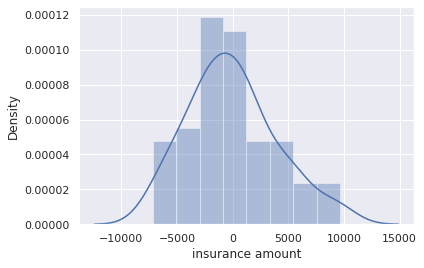

In [27]:
sns.distplot(y_test-y_pred)

## K-Nearest Neighbours Regression Model

In [28]:
#Training
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=15)

Training score :  0.6229856135216898
predictions are :
 [24086.66666667 21773.33333333 33280.         20860.
 30773.33333333 34860.         24146.66666667 19926.66666667
 18753.33333333 33440.         32933.33333333 32104.66666667
 20420.         27733.33333333 33026.66666667 24433.33333333
 30760.         27166.66666667 36202.66666667 32960.
 23613.33333333 19506.66666667 26846.66666667 31040.
 33713.33333333 28540.         32806.66666667 20846.66666667
 29046.66666667 33833.33333333 27566.66666667 20600.
 30240.         20680.         29660.         18753.33333333
 25520.         34886.66666667 19626.66666667 27053.33333333
 31671.33333333 31646.66666667 31814.         27000.
 18120.         20146.66666667 32620.         19540.
 33313.33333333 21213.33333333 29806.66666667 20940.
 20706.66666667 24173.33333333 33640.         20086.66666667
 25840.         19246.66666667 30006.66666667 26926.66666667]




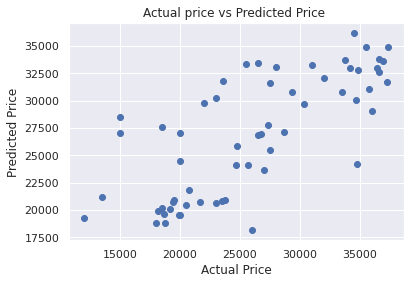

In [29]:
#Predicting
y_pred = knn.predict(x_test)

print('Training score : ',knn.score(x_train,y_train))

print('predictions are :\n',y_pred)
print('\n')

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price ")
plt.show()

In [32]:
#scores
r2= r2(y_test,y_pred)
print('R square error : ',r2)
mse = MSE(y_test,y_pred)
print('Mean sqaure error  : ',mse)
mae = MAE(y_test,y_pred)
print('Mean Absolute  error : ',mae)
rmse = np.sqrt(MSE(y_test,y_pred))
print('Root Mean sqaure error : ',rmse)


R square error :  0.5387160496840765
Mean sqaure error  :  22629901.787037037
Mean Absolute  error :  3471.9722222222217
Root Mean sqaure error :  4757.089634118432


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


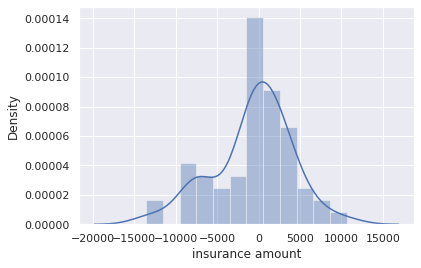

In [33]:
sns.distplot(y_test-y_pred)

## Support Vector Regression Model

In [56]:
#Training
from sklearn.svm import SVR
svr=SVR(kernel='poly')
svr.fit(x_train,y_train)

SVR(kernel='poly')

Training score :  0.029645064049166003
predictions are :
 [26888.22392618 26808.5959661  27196.21195007 26788.59904716
 26984.61122624 27437.36130415 26853.45004191 26788.58583707
 26790.05256297 27164.69370443 27210.77425113 27230.40441335
 26794.30921635 26923.46798611 27217.71081077 26879.23450757
 27000.03103763 26908.81956307 27505.09591086 27201.39700535
 26870.27496928 26782.02011596 26897.09879303 27029.22415476
 27108.49624381 27002.74830279 27047.70289247 26810.98469567
 26988.88121344 27348.51698844 26929.4172603  26787.86707672
 26968.49140066 26804.76302036 27011.01854828 26789.58975654
 26882.81040816 27075.68551115 26788.32641718 26913.85570375
 27251.96457985 27047.68817597 27313.61870361 26959.13242796
 26780.83719297 26783.28269265 27047.95435909 26806.46456501
 27081.8655419  26817.82691599 26984.89514683 26811.81944221
 26806.93208803 26891.81208319 27114.46248631 26798.66526279
 26885.54509595 26782.52159312 27017.4739747  26927.09456052]




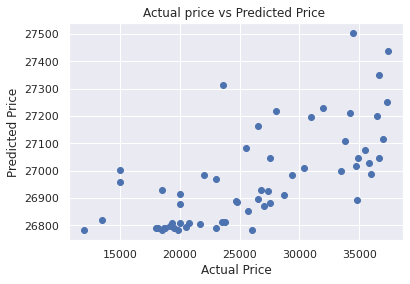

In [57]:
#Predicting
y_pred = svr.predict(x_test)

print('Training score : ',svr.score(x_train,y_train))

print('predictions are :\n',y_pred)
print('\n')

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price ")
plt.show()

In [38]:
#scores
r2= r2(y_test,y_pred)
print('R square error : ',r2)
mse = MSE(y_test,y_pred)
print('Mean sqaure error  : ',mse)
mae = MAE(y_test,y_pred)
print('Mean Absolute  error : ',mae)
rmse = np.sqrt(MSE(y_test,y_pred))
print('Root Mean sqaure error : ',rmse)


R square error :  0.021425028793325862
Mean sqaure error  :  48007426.82352802
Mean Absolute  error :  5910.942608910112
Root Mean sqaure error :  6928.739194364875


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


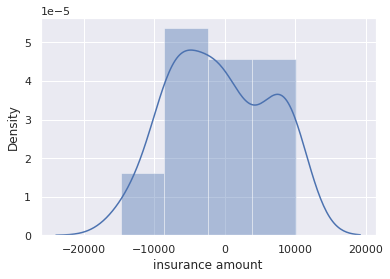

In [39]:
sns.distplot(y_test-y_pred)

## Decision Tree Regression Model

In [41]:
#Training
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

Training score :  0.9755804345145775
predictions are :
 [24400. 22300. 28000. 18000. 32500. 37000. 27000. 18000. 18200. 33000.
 35000. 32300. 18000. 28500. 37300. 30600. 26500. 25500. 38500. 37300.
 23500. 18000. 26900. 32500. 35000. 17500. 35100. 28800. 21000. 37000.
 22000. 23000. 21000. 22000. 28600. 18100. 27100. 31500. 22300. 22000.
 37000. 30800. 13770. 12200. 22300. 18000. 37200. 22200. 36000. 20000.
 32500. 20400. 18000. 25000. 27500. 22300. 23500. 18000. 30800. 22000.]




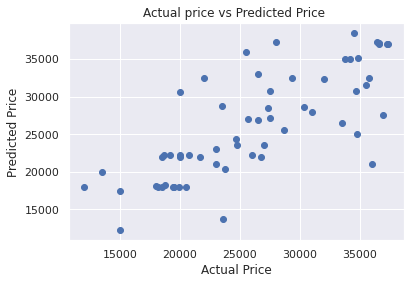

In [42]:
#Predicting
y_pred = dt.predict(x_test)

print('Training score : ',dt.score(x_train,y_train))

print('predictions are :\n',y_pred)
print('\n')

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price ")
plt.show()

In [44]:
#scores
r2= r2(y_test,y_pred)
print('R square error : ',r2)
mse = MSE(y_test,y_pred)
print('Mean sqaure error  : ',mse)
mae = MAE(y_test,y_pred)
print('Mean Absolute  error : ',mae)
rmse = np.sqrt(MSE(y_test,y_pred))
print('Root Mean sqaure error : ',rmse)


R square error :  0.5331572387648762
Mean sqaure error  :  22902608.75
Mean Absolute  error :  3388.25
Root Mean sqaure error :  4785.667012026641


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


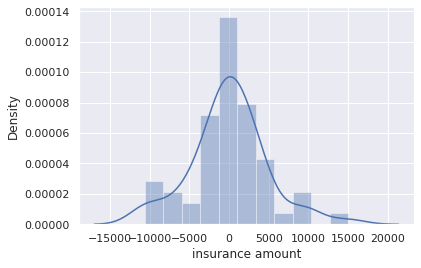

In [45]:
sns.distplot(y_test-y_pred)

## Random Forest Regression Model

In [47]:
#Training
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

Training score :  0.9163365158954438
predictions are :
 [25047.4        22223.         32114.4        18638.
 31440.         35633.4        27780.         18774.66666667
 17082.16666667 32794.         33019.1        33148.
 18516.16666667 30133.         31589.         26729.
 26260.         26201.25       38495.         31648.
 27055.2        15645.33333333 26480.         31528.
 35281.         20477.         32678.         25999.
 24825.         32842.2        22670.         20912.33333333
 24507.         22554.33333333 30660.         17077.16666667
 28721.         35382.         20362.         22642.33333333
 36509.         24681.         26287.3        22472.
 18479.         18381.33333333 33176.         21993.5
 32108.         20024.         29670.         22546.
 17862.         24540.95       33029.8        21658.
 26233.         18583.         27741.         22299.75      ]




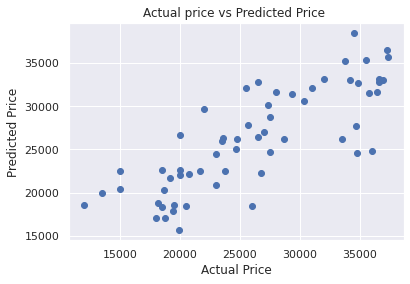

In [48]:
#Predicting
y_pred = rf.predict(x_test)

print('Training score : ',rf.score(x_train,y_train))

print('predictions are :\n',y_pred)
print('\n')

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted Price ")
plt.show()

In [50]:
#scores
r2= r2(y_test,y_pred)
print('R square error : ',r2)
mse = MSE(y_test,y_pred)
print('Mean sqaure error  : ',mse)
mae = MAE(y_test,y_pred)
print('Mean Absolute  error : ',mae)
rmse = np.sqrt(MSE(y_test,y_pred))
print('Root Mean sqaure error : ',rmse)

R square error :  0.6539872707856098
Mean sqaure error  :  16974867.80934722
Mean Absolute  error :  3189.103055555556
Root Mean sqaure error :  4120.0567725878755


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


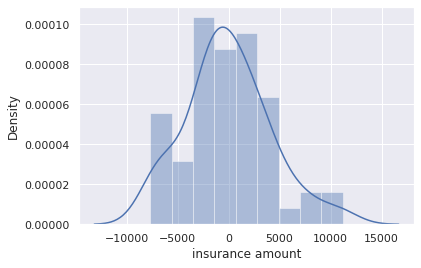

In [51]:
sns.distplot(y_test-y_pred)